<span style="font-size: 14px;color:blue"><b>*Project Scope*</b></span>
<br>.......
<br>.......
<br>**Objectives** 
<br>.......
<br>.......

**Data Source**
<br>........

**This script performs data cleaning and outlier detection on the raw .... dataset. It handles missing values,
removes duplicates, and identifies potential outliers using appropriate techniques. The cleaned data is then
saved as a pickle file for further analysis and exploratory data analysis (EDA).**

<span style="font-size: 22px;color:blue">1.Import Libraries</span>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import holidays
from pyproj import Proj, transform
from datetime import datetime


<span style="font-size: 22px;color:blue">2.Read datasets</span>

In [2]:
loan =pd.read_excel('../../02 Data/Original Data/internal/data.xlsx')
   # G:\MyGitHubRepositories\MyDataProjects\Vehicle-Loan-Default-Prediction\02 Data\Original Data\Internal


<span style="font-size: 22px;color:blue">3.Quickly explore the data</span>

In [5]:
loan.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
3,529269,46349,61500,76.42,67,22807,45,1502,1988-06-01,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
4,563215,43594,78256,57.50,67,22744,86,1499,1994-07-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


In [8]:
print ( 'This dataset includes {} observations and {} columns.'.format(loan.shape[0] , loan.shape[1]))

This dataset includes 233154 observations and 41 columns.


In [11]:
loan.info()
print("\It seems that we have missing value for employyee type.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      225493 non-null  object        
 

<span style="font-size: 22px;color:blue">4.Data cleaning </span>

 <span style="font-size: 22px;color:blue">-Finding and Dealing with missing vlaues  </span>

In [28]:
departure.isna().sum()


data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [28]:
departure.dropna(inplace =True)
print('There are 3,055 rows in which the "carrier" column is empty, so we will exclude those rows from our analysis. ')

There are 3,055 rows in which the "carrier" column is empty, so we will exclude those rows from our analysis. 


In [29]:
departure.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [30]:
passenger.isna().sum()

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         2797
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

In [31]:
passenger.dropna(inplace =True)
print('There are 2,797 rows in which the "carrier" column is empty, so we will exclude those rows from our analysis. ')
passenger.isna().sum()

There are 2,797 rows in which the "carrier" column is empty, so we will exclude those rows from our analysis. 


data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [32]:
passenger.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

 <span style="font-size: 22px;color:blue">-Finding and Removing Duplicates </span> 
<BR> No duplicates found


In [49]:
departure[departure.duplicated()]

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total


In [50]:
passenger[passenger.duplicated()]

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total


 <span style="font-size: 22px;color:blue">-Finding Inconsistant texts and typos </span>
 <span style="font-size: 22px;color:blue">-Fixing Inconsistant texts and typos </span>

In [33]:
departure.usg_apt.value_counts()

MIA    133729
JFK     78148
LAX     57485
ORD     43835
EWR     36688
        ...  
ANP         1
GUS         1
BGT         1
EMT         1
UBF         1
Name: usg_apt, Length: 1022, dtype: int64

In [36]:
d = departure.merge(airports,how='left' , left_on ='usg_apt' , right_on = 'Airport_Code' )

In [38]:
d[pd.notna(d.Airport_Code)]

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,Airport_Code,Airport_Code1,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,...,GUM,PGUM,13.483400,144.796005,298.0,10,U,Pacific/Guam,airport,OurAirports
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,...,ANC,PANC,61.174400,-149.996002,152.0,-9,A,America/Anchorage,airport,OurAirports
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,...,BOS,KBOS,42.364300,-71.005203,20.0,-5,A,America/New_York,airport,OurAirports
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,...,DAL,KDAL,32.847099,-96.851799,487.0,-6,A,America/Chicago,airport,OurAirports
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,...,MIA,KMIA,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927748,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,...,MIA,KMIA,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports
927749,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,...,MIA,KMIA,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports
927750,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,...,MIA,KMIA,25.793200,-80.290604,8.0,-5,A,America/New_York,airport,OurAirports
927751,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,...,IAH,KIAH,29.984400,-95.341400,97.0,-6,A,America/Chicago,airport,OurAirports


In [40]:
# For these items the airpost code could nt be found in the refrence dataset????
d[pd.isna(d.Airport_Code)]

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,Airport_Code,Airport_Code1,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone
217,05/01/2010,2010,5,15395,TX3,74,16477,QRO,148,20166,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,08/01/2006,2006,8,11391,DQK,22,12651,KEF,439,20344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,09/01/2007,2007,9,99999,ZZZ,1,13602,NAN,821,19874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540,04/01/2007,2007,4,12134,HIK,2,11351,DNA,736,20057,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
580,04/01/2003,2003,4,15825,WQM,72,16178,YQX,961,20213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927384,09/01/2005,2005,9,13002,LKE,93,16263,YYJ,906,20272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927398,07/01/2003,2003,7,13002,LKE,93,16007,YBL,906,20272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927521,07/01/2004,2004,7,13002,LKE,93,16007,YBL,906,20272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927693,08/01/2003,2003,8,13002,LKE,93,16007,YBL,906,20272,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Are these carriers valid? Some of them have 3-character codes, some others have 2-character codes?? 
departure[departure.carrier.str.len() != 2]
departure.carrier.str.len().value_counts()

2    795542
3    132211
Name: carrier, dtype: int64

In [57]:
departure.fg_apt.value_counts()

YYZ    50044
CUN    32168
MEX    26781
NRT    21275
YVR    20941
       ...  
YGR        1
DZO        1
LRC        1
ASB        1
QNE        1
Name: fg_apt, Length: 1669, dtype: int64

In [61]:
departure.carrier.value_counts()

AA     58739
DL     48520
UA     42469
CO     25754
FX     21621
       ...  
WOA        1
SKB        1
PNA        1
KO         1
PU         1
Name: carrier, Length: 734, dtype: int64

 <span style="font-size: 22px;color:blue">-Finding and Dealing with outliers </span> 

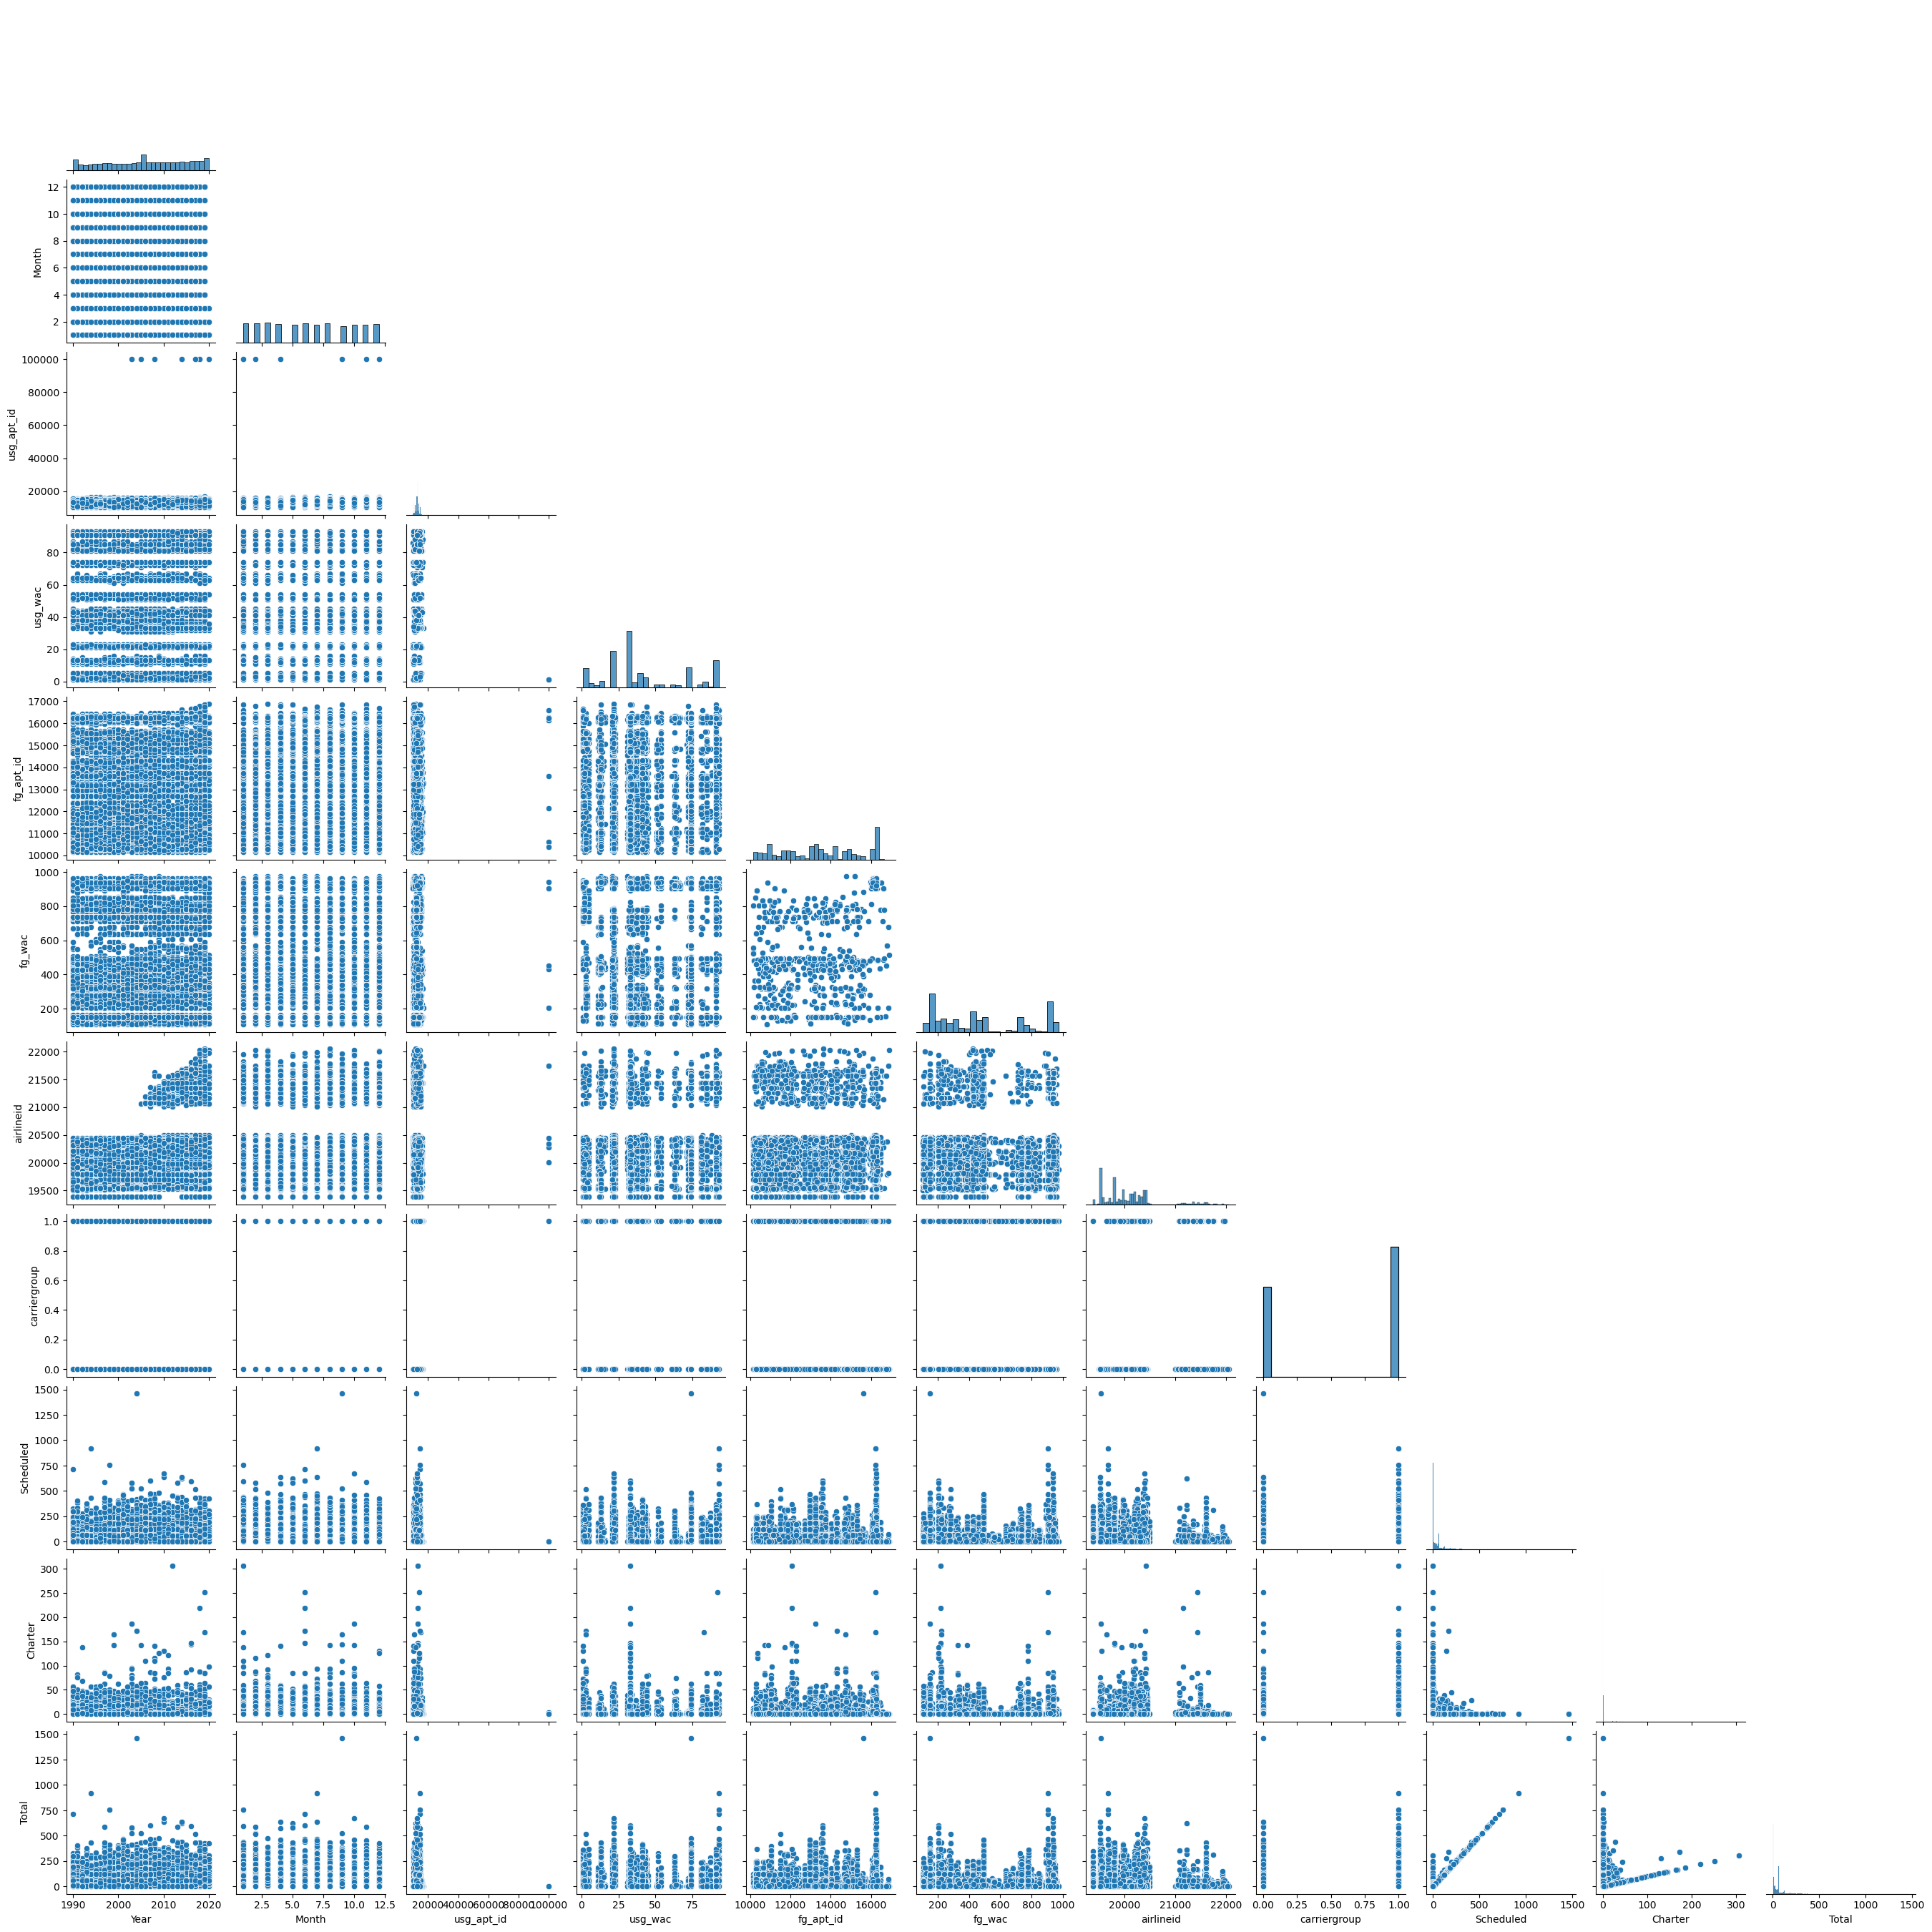

In [6]:
sns.pairplot(departure.select_dtypes('number').sample(20000),corner = 'True')

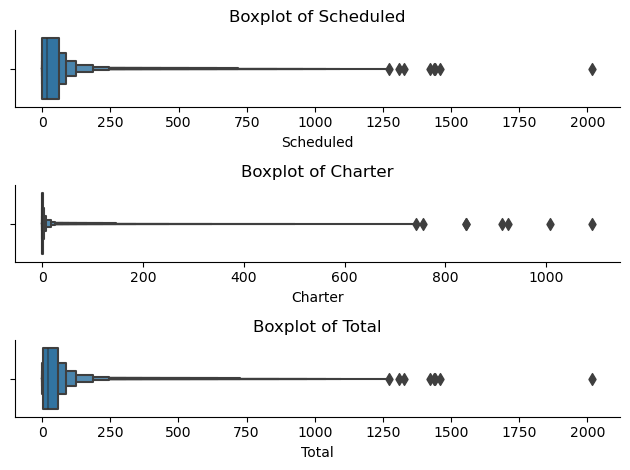

In [8]:
# It seems we have outliers in Total, Schedled, and Charter 
# How we should deal with these outliers ???

columns = ['Scheduled','Charter','Total']
fig,ax = plt.subplots(len(columns),layout = "tight")

for col ,ax in zip(columns,ax.flat):
    sns.boxenplot(data=departure,x=col,ax=ax) ;
    sns.despine();
    ax.set_title("Boxplot of " + col)

In [16]:
q25,q50,q75 = np.percentile(departure.Total,(25,50,75))
q25,q50,q75
iqr=q75-q25
departure[(departure.Total < q25 - 1.5 * iqr) | (departure.Total > q75 + 1.5 * iqr)]

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
2767,07/01/2008,2008,7,13303,MIA,33,12073,HAV,219,20401,3M,1,Departures,0,164,164
3820,08/01/2008,2008,8,13303,MIA,33,12073,HAV,219,20401,3M,1,Departures,0,256,256
4064,10/01/2003,2003,10,13303,MIA,33,13252,MEX,148,19534,AM,0,Departures,0,186,186
4380,06/01/2001,2001,6,11298,DFW,74,11032,CUN,148,20204,MG,1,Departures,0,148,148
5947,07/01/2003,2003,7,13303,MIA,33,12073,HAV,219,19704,CO,1,Departures,0,147,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


In [20]:
airports[airports.City.isin(['MIA' , 'JFK'])]

,Airport,Airport_ID,Name,City,Country,IATA/FAA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_database_time_zone
3576,Miami International Airport,Miami,United States,MIA,KMIA,25.793200,-80.290604,8,-5,A,America/New_York,airport,OurAirports
3797,John F Kennedy International Airport,New York,United States,JFK,KJFK,40.639801,-73.778900,13,-5,A,America/New_York,airport,OurAirports


 <span style="font-size: 22px;color:blue">5-Create New columns </span>

In [ ]:
departure.merge(airports, how ='left' , left_on ='' , right_on  ='Airport_Code')

<span style="font-size: 16px">
****** Data has been cleaned
... columns have been added to the ... data. 
<br> ....                : date of the ... 
.
    
The data frame will be saved in <i>binary</i> format(Pickle) ******
</span> <br> <br>
<span style="font-size: 20px;color:blue">6-Create PICKE file</span>

In [59]:
df.to_pickle('***.pkl')
